# Breast Cancer Wisconsin (Original)

## Citation

1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.
2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, December 1990, pp 9193-9196.
3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition via linear programming: Theory and application to medical diagnosis", in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.
4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming discrimination of two linearly inseparable sets", Optimization Methods and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

## Importing Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd

## Importing Dataset

In [23]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [4]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

## Data Visualization

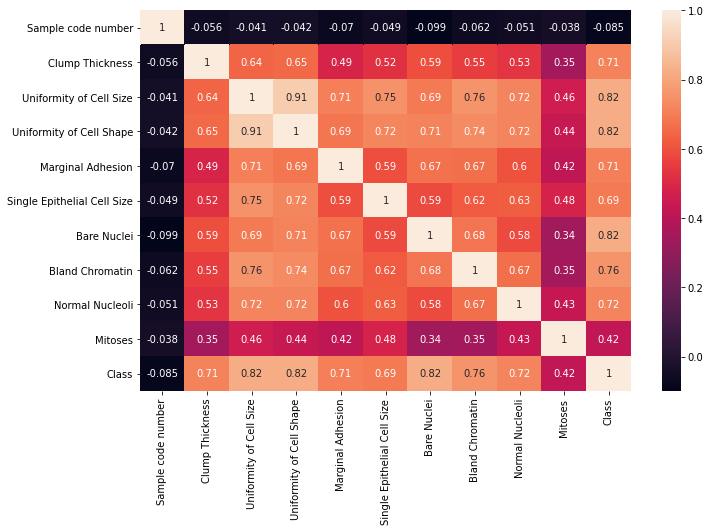

In [5]:
plt.figure(figsize=(11, 7))
sns.heatmap(df.corr(), annot=True)
plt.show()

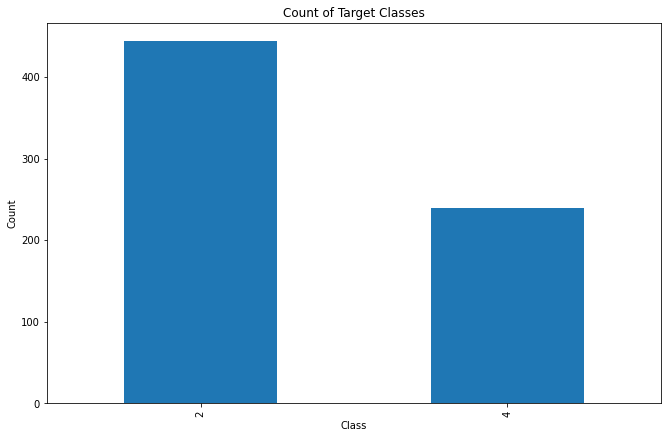

In [44]:
df['Class'].value_counts().plot(
    kind='bar', 
    figsize=(11, 7), 
    title='Count of Target Classes',
    xlabel='Class',
    ylabel='Count'
)
plt.show()

class 2 for benign and class 4 for malignant 

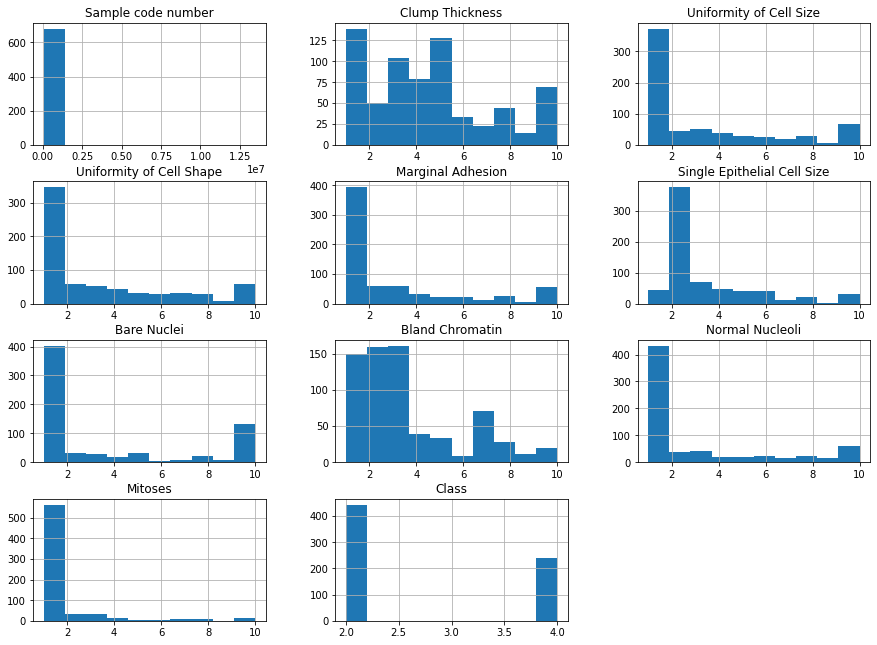

In [7]:
rcParams['figure.figsize'] = 15, 11
df.hist()
plt.show()

## Split into Training Set and Test Set

In [8]:
X = df.iloc[:, 1:-1].values
X

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [9]:
y = df.iloc[:, -1].values
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

## Split into Training Set and Test Set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training Model

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Evaluate Model

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(f'accuracy score: {"{:.2f}".format(accuracy_score(y_test, y_pred)*100)} %')

[[84  3]
 [ 1 49]]
accuracy score: 97.08 %


### Evaluate with k-Fold Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print(f'accuracy: {"{:.2f}".format(accuracies.mean()*100)} %')
print(f'standard deviation: {"{:.2f}".format(accuracies.std()*100)} %')

accuracy: 96.70 %
standard deviation: 2.58 %


##### 94.12 - 99.28 %

## Tuning Model

In [16]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [18]:
n_estimators = np.arange(10, 160, 10)
random_state = np.arange(0, 21)

In [19]:
from sklearn.model_selection import GridSearchCV
parameters = [
    {
        'n_estimators': n_estimators,
        'criterion': ['gini', 'entropy'],
        'random_state': random_state,
        'class_weight': ['balanced', 'balanced_subsample', None]
    }
]

grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=parameters,
    scoring='accuracy',
    cv=10,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f'best accuracy: {"{:.2f}".format(best_accuracy*100)} %')
print(f'best parameters: {best_parameters}')

best accuracy: 97.62 %
best parameters: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'n_estimators': 130, 'random_state': 1}


In [20]:
df_cv_result = pd.DataFrame(grid_search.cv_results_)
df_cv_result.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_n_estimators,param_random_state,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1492,0.187679,0.005484,0.014103,0.003959,None,gini,120,1,"{'class_weight': None, 'criterion': 'gini', 'n...",0.927273,...,1.0,0.963636,1.0,0.981481,0.962963,1.0,0.981481,0.976229,0.021614,1
883,0.265599,0.013151,0.013400,0.000916,balanced_subsample,gini,130,1,"{'class_weight': 'balanced_subsample', 'criter...",0.945455,...,1.0,0.945455,1.0,0.981481,0.962963,1.0,0.981481,0.976229,0.020026,1
1151,0.191100,0.002071,0.009800,0.000400,balanced_subsample,entropy,100,17,"{'class_weight': 'balanced_subsample', 'criter...",0.945455,...,1.0,0.945455,1.0,0.981481,0.962963,1.0,0.981481,0.976229,0.020026,1
904,0.281561,0.014258,0.015203,0.002273,balanced_subsample,gini,140,1,"{'class_weight': 'balanced_subsample', 'criter...",0.945455,...,1.0,0.945455,1.0,0.981481,0.962963,1.0,0.981481,0.976229,0.020026,1
925,0.340610,0.043808,0.015800,0.001400,balanced_subsample,gini,150,1,"{'class_weight': 'balanced_subsample', 'criter...",0.945455,...,1.0,0.945455,1.0,0.981481,0.962963,1.0,0.981481,0.976229,0.020026,1


In [21]:
y_pred = grid_search.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(f'accuracy score: {"{:.2f}".format(accuracy_score(y_test, y_pred)*100)} %')

[[84  3]
 [ 1 49]]
accuracy score: 97.08 %
